In [17]:
# import necessary modules
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [18]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Pre-Processing

In [19]:
# drop unnecessary feature

df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [20]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
df['Geography'].replace({'France':0,'Spain':1,'Germany':2},inplace=True)

In [21]:
df.shape

(10000, 11)

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


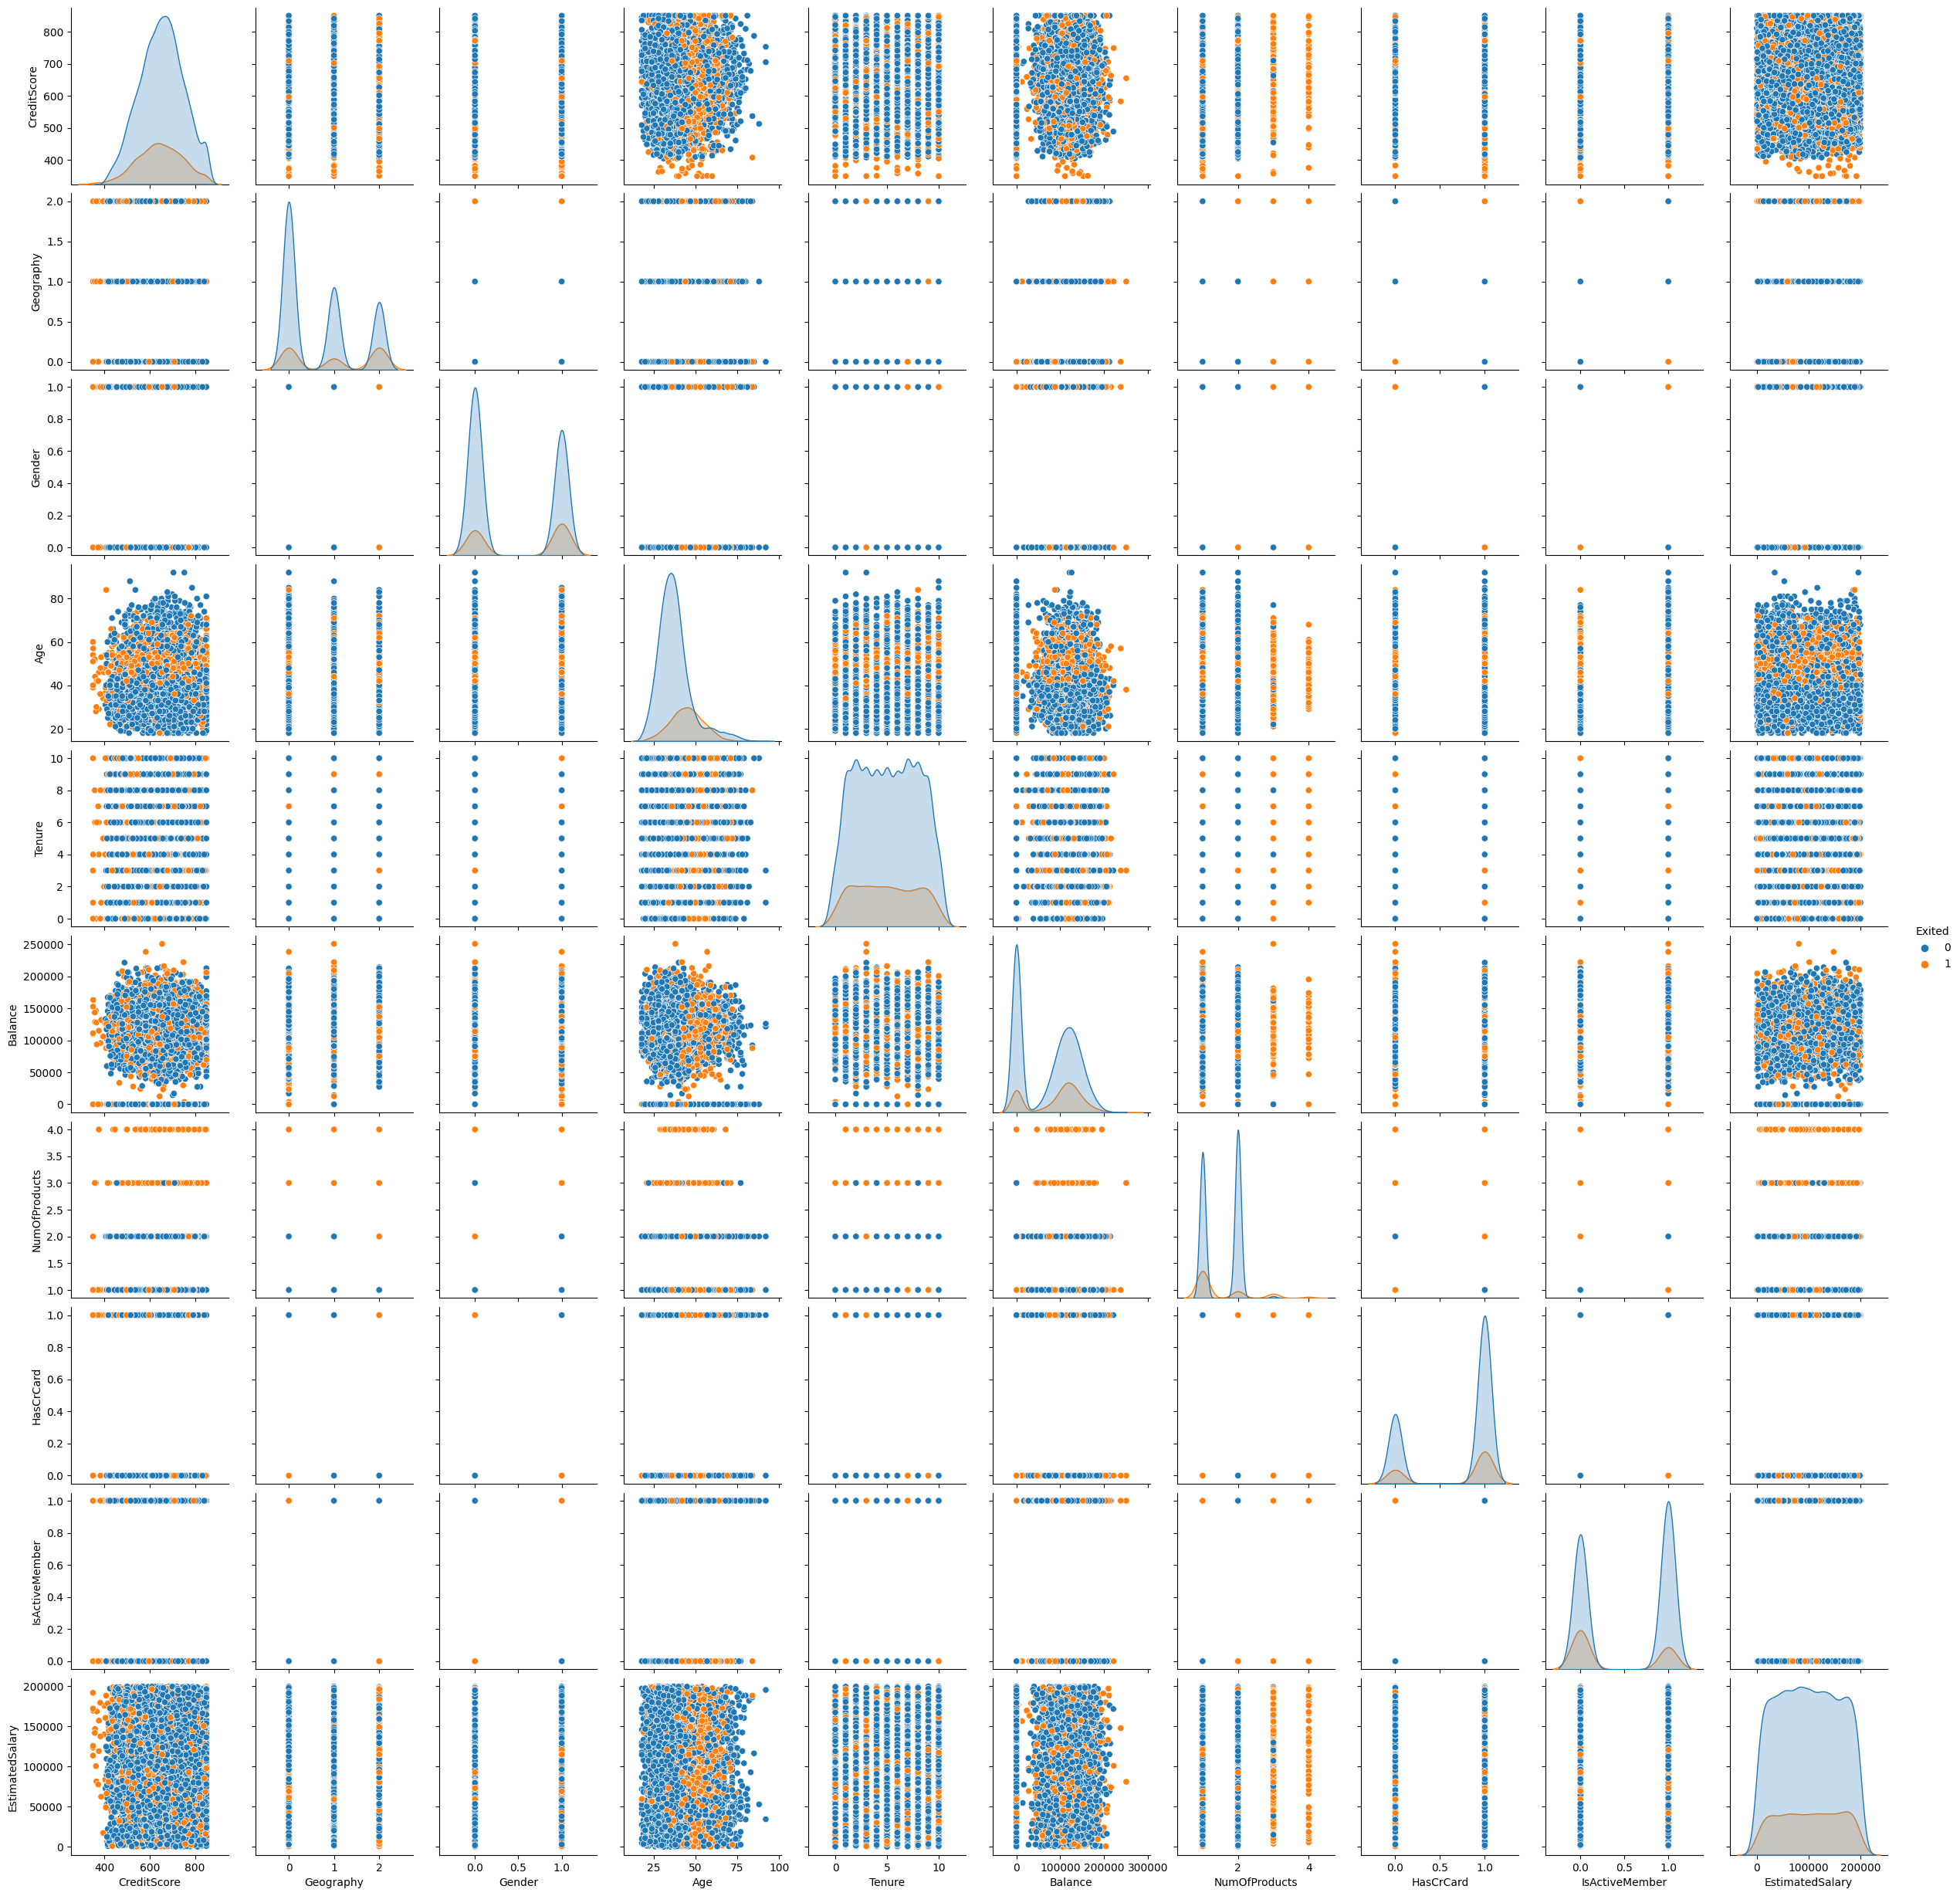

In [23]:
sns.pairplot(df,hue='Exited')

In [24]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [25]:
# # Dividing dependent and independent variables
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [26]:
# Sampling
from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y)))

SMOTE Counter({1: 7963, 0: 7963})


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression  

classifier= LogisticRegression(random_state=0)  
lr_model=classifier.fit(X_train, y_train)
y_pred=lr_model.predict(X_test)

In [30]:
# Accuracy = TP+TN/TP+FP+FN+TN
# Precision = TP/TP+FP
# Recall = TP/TP+FN
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)


from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      2036
           1       0.74      0.77      0.75      1946

    accuracy                           0.75      3982
   macro avg       0.75      0.75      0.75      3982
weighted avg       0.75      0.75      0.75      3982



Text(50.722222222222214, 0.5, 'Actual Label')

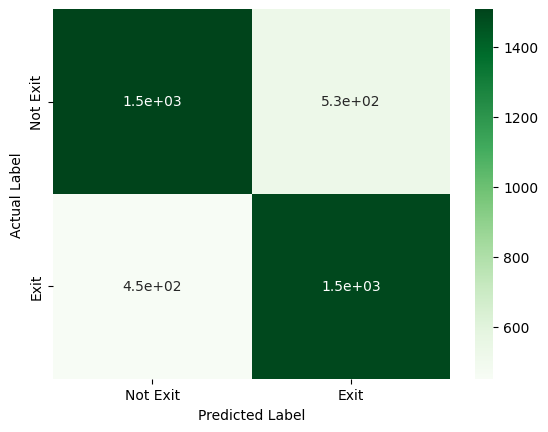

In [31]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_model.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      2036
           1       0.76      0.80      0.78      1946

    accuracy                           0.78      3982
   macro avg       0.78      0.78      0.78      3982
weighted avg       0.78      0.78      0.78      3982



Text(50.722222222222214, 0.5, 'Actual Label')

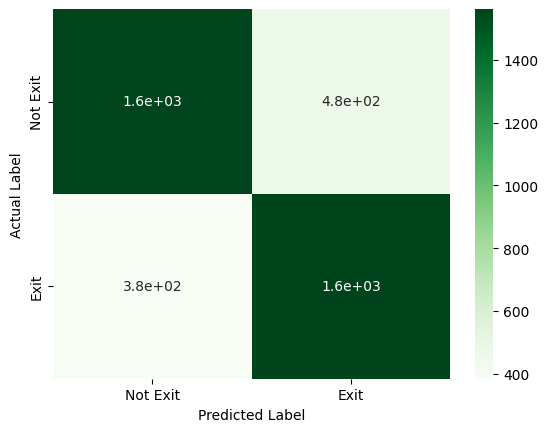

In [34]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier(n_neighbors=25)

# Train the model using the training sets
knn_model=clf.fit(X_train,y_train)

y_pred=knn_model.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2036
           1       0.79      0.81      0.80      1946

    accuracy                           0.80      3982
   macro avg       0.80      0.80      0.80      3982
weighted avg       0.80      0.80      0.80      3982



Text(50.722222222222214, 0.5, 'Actual Label')

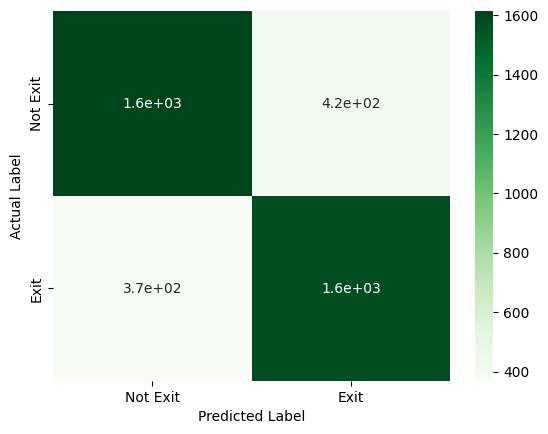

In [37]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model=clf.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2036
           1       0.84      0.85      0.85      1946

    accuracy                           0.85      3982
   macro avg       0.85      0.85      0.85      3982
weighted avg       0.85      0.85      0.85      3982



In [40]:
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[1726,  310],
       [ 288, 1658]])

Text(50.722222222222214, 0.5, 'Actual Label')

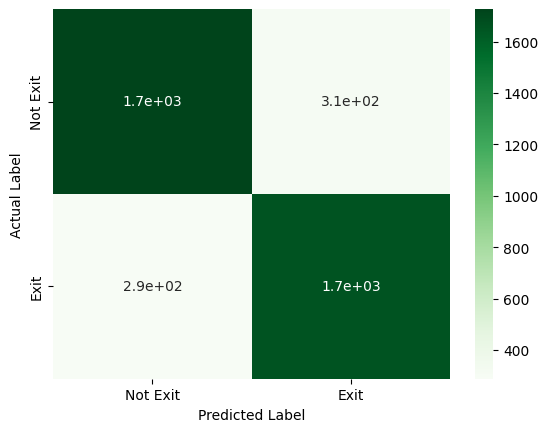

In [41]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Saving Model

In [42]:
import pickle
pickle.dump(rf_model, open('pickle.pkl','wb'))

In [43]:
# Loading model to compare the results

model = pickle.load(open('pickle.pkl','rb'))
print(rf_model.predict([[432, 1, 0, 34, 3, 44440,2 , 1, 0,50000]]))

[1]
